In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image
import pickle
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [28]:
os.chdir('C:/Users/Deeksha Priya/Desktop/traffic_sign_recognition')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
cur_path = os.getcwd()

In [30]:
cur_path

'C:\\Users\\Deeksha Priya\\Desktop\\traffic_sign_recognition'

In [31]:
data = []
labels = []
classes = 43

In [32]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [33]:
data = np.array(data)
labels = np.array(labels)

In [34]:
np.save('./training/data',data)
np.save('./training/target',labels)

In [35]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [36]:
data.shape

(39209, 30, 30, 3)

In [37]:
labels.shape

(39209,)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [39]:
X_train.shape

(31367, 30, 30, 3)

In [40]:
X_test.shape

(7842, 30, 30, 3)

In [41]:
y_train.shape

(31367,)

In [42]:
y_test.shape

(7842,)

In [43]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [44]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(X_train.shape[1:])),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),   
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [45]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
history= model.fit(X_train , y_train, batch_size = 10, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
3137/3137 [==============================] - 79s 25ms/step - loss: 0.7170 - accuracy: 0.8286 - val_loss: 0.1623 - val_accuracy: 0.9588
Epoch 2/20
3137/3137 [==============================] - 77s 25ms/step - loss: 0.2140 - accuracy: 0.9467 - val_loss: 0.1141 - val_accuracy: 0.9718
Epoch 3/20
3137/3137 [==============================] - 81s 26ms/step - loss: 0.1508 - accuracy: 0.9641 - val_loss: 0.0779 - val_accuracy: 0.9788
Epoch 4/20
3137/3137 [==============================] - 82s 26ms/step - loss: 0.1405 - accuracy: 0.9651 - val_loss: 0.0832 - val_accuracy: 0.9799
Epoch 5/20
3137/3137 [==============================] - 80s 25ms/step - loss: 0.1314 - accuracy: 0.9707 - val_loss: 0.0673 - val_accuracy: 0.9872
Epoch 6/20
3137/3137 [==============================] - 79s 25ms/step - loss: 0.1195 - accuracy: 0.9742 - val_loss: 0.1064 - val_accuracy: 0.9791
Epoch 7/20
3137/3137 [==============================] - 81s 26ms/step - loss: 0.1349 - accuracy: 0.9748 - val_loss: 0.1034 -

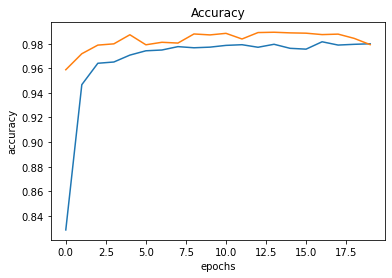

In [47]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

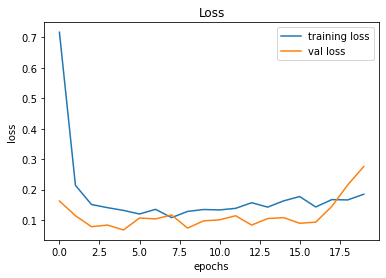

In [48]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [49]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [50]:
X_test, label = testing('Test.csv')

In [51]:
Y_pred = model.predict_classes(X_test)
Y_pred

array([16,  1, 38, ...,  1,  7, 10], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.945526524148852


In [53]:
model.save("sign_model.h5")

In [54]:
model = keras.models.load_model("sign_model.h5")

In [55]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [56]:
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Bumpy road


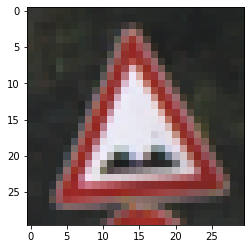

In [60]:
plot,prediction = test_on_img(r'C:/Users/Deeksha Priya/Desktop/traffic_sign_recognition/Test/00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()